In [62]:
import pandas as pd
import seaborn as sns; sns.set()
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,5

In [63]:
df = pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States.csv')

In [64]:
df_canc = df[(df['Cause Name'] == 'Cancer') & (df['State'] == 'United States')].reset_index()

In [65]:
df_all = df[(df['Cause Name'] == 'All causes') & (df['State'] == 'United States')].reset_index()

In [66]:
df_canc['Percentage'] = df_canc['Deaths'] / df_all['Deaths']

Text(0.5, 1.0, 'Cancer death rate as a percentage of total deaths')

<Figure size 720x360 with 0 Axes>

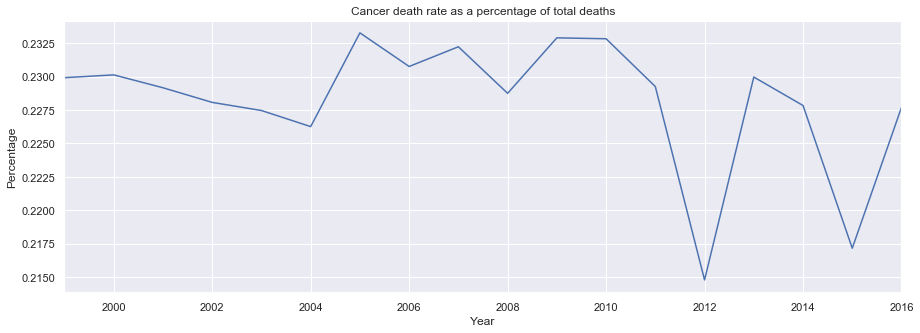

In [67]:
#plot data
fig = plt.figure(figsize=(10,5))
df_canc[['Year', 'Percentage']].set_index('Year').plot(legend=None)
plt.ylabel('Percentage')
plt.title("Cancer death rate as a percentage of total deaths")

In [68]:
df_a = df[(df['State'] == 'United States') & (df['Cause Name'] != 'All causes')]

In [69]:
# group_by diagnostics
'''
for name, group in df_a.groupby(['Cause Name', 'Year']):
    print(name)
    print(group)

def foo(gr): 
    #print(gr.nlargest(3, 'Deaths'), '\n')
    return gr.nlargest(3, 'Deaths')
 
df_b = df_a.groupby(['Year']).apply(func=foo)
'''

"\nfor name, group in df_a.groupby(['Cause Name', 'Year']):\n    print(name)\n    print(group)\n\ndef foo(gr): \n    #print(gr.nlargest(3, 'Deaths'), '\n')\n    return gr.nlargest(3, 'Deaths')\n \ndf_b = df_a.groupby(['Year']).apply(func=foo)\n"

In [70]:
df_b = df_a.groupby(['Year']).apply(lambda grp: grp.nlargest(3, 'Deaths')).set_index('Year')
df_b['Rank'] = df_b.groupby(['Year'])['Deaths'].rank(ascending=1, method='first')

In [71]:
df_b[['Rank', 'Cause Name']].head()

,Rank,Cause Name
Year,,
1999,3.0,Heart disease
1999,2.0,Cancer
1999,1.0,Stroke
2000,3.0,Heart disease
2000,2.0,Cancer


In [72]:
pd.pivot_table(df_b, index = 'Year', columns = 'Cause Name', values = 'Rank').head()

Cause Name,CLRD,Cancer,Heart disease,Stroke,Unintentional injuries
Year,,,,,
1999,NaN,2.0,3.0,1.0,NaN
2000,NaN,2.0,3.0,1.0,NaN
2001,NaN,2.0,3.0,1.0,NaN
2002,NaN,2.0,3.0,1.0,NaN
2003,NaN,2.0,3.0,1.0,NaN


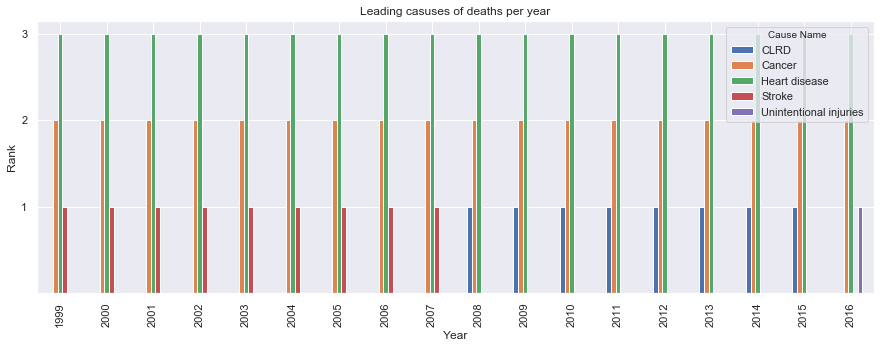

<Figure size 72x360 with 0 Axes>

In [75]:
# grouped bar plot
fig = plt.figure(figsize=(15,5))
pd.pivot_table(df_b, index = 'Year', columns = 'Cause Name', values = 'Rank').plot(kind = 'bar')
plt.ylabel('Rank')
plt.yticks([1,2,3]) 
plt.title("Leading casuses of deaths per year")